# 단순선형회귀

> 속도에 따른 제동거리 예측 데이터셋

## #01. 준비작업

### [1] 패키지 가져오기

In [1]:
# 연결된 모듈이 업데이트 되면 즉시 자동 로드함
%load_ext autoreload
%autoreload 2

from hossam.util import *
from hossam.plot import *

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from ipywidgets import interact

### [2] 데이터셋 준비하기

In [2]:
origin = my_read_excel('https://data.hossam.kr/mldata/cars.xlsx', info=False)

## #02. 데이터 전처리

### [1] 훈련/검증 데이터 분리

In [3]:
x_train, x_test, y_train, y_test = my_train_test_split(origin, yname='dist', test_size = 0.3)
rows, cols = x_train.shape
rows, cols

(35, 1)

## #03. 훈련 모델 적합

### [1] 신경망 정의

| 구분 | 모델 | 활성화 함수 | 옵티마이저 | 손실함수 | 평가지표 | 대표예제 |
|--|--|--|--|--|--|--|
| 회귀 | 단순선형회귀 | relu, linear | adam | mse | mae | |

In [4]:
model = Sequential()

# 최종 검증 손실률: 374.854431, 최종 검증 절대오차: 15.983886
# model.add(Dense(2, activation = 'relu', input_shape = (cols, )))

# 최종 검증 손실률: 376.018341, 최종 검증 절대오차: 15.594769
model.add(Dense(4, activation = 'relu', input_shape = (cols, )))

# 최종 검증 손실률: 377.073425, 최종 검증 절대오차: 16.292393
# model.add(Dense(8, activation = 'relu', input_shape = (cols, )))

# 최종 검증 손실률: 380.726410, 최종 검증 절대오차: 16.663055
# model.add(Dense(16, activation = 'relu', input_shape = (cols, )))

# 최종 검증 손실률: 386.750305, 최종 검증 절대오차: 17.112757
# model.add(Dense(32, activation = 'relu', input_shape = (cols, )))

# 하나의 값을 출력
# -> 정답의 범위가 정해지지 않기 때문에 활성화 함수는 linear
# -> linear는 기본값이므로 생략 가능함.
model.add(Dense(1, activation='linear'))

# 손실함수는 mse, 최적화 함수는 adam --> 문자열로 지정하는 것도 가능함
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 8         
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


### [2] 학습하기

In [5]:
%%time
result = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=500, verbose=0)

evaluate1 = model.evaluate(x_train, y_train)
print("최종 훈련 손실률: %f, 최종 훈련 절대오차: %f" % (evaluate1[0], evaluate1[1]))

evaluate2 = model.evaluate(x_test, y_test)
print("최종 검증 손실률: %f, 최종 검증 절대오차: %f" % (evaluate2[0], evaluate2[1]))

result_df = DataFrame(result.history)
result_df["epochs"] = result_df.index + 1
result_df.set_index('epochs', inplace=True)
result_df

2/2 [==============================] - 0s 3ms/step - loss: 1931.6792 - mae: 36.9572
최종 훈련 손실률: 1931.679199, 최종 훈련 절대오차: 36.957157
1/1 [==============================] - 0s 16ms/step - loss: 1826.8387 - mae: 35.1701
최종 검증 손실률: 1826.838745, 최종 검증 절대오차: 35.170143
CPU times: total: 984 ms
Wall time: 12 s


,loss,mae,val_loss,val_mae
epochs,,,,
1,4692.134277,61.647350,4381.333496,57.992725
2,4678.101074,61.545670,4368.561523,57.899582
3,4664.042969,61.444641,4355.939941,57.807392
4,4650.097656,61.345039,4343.101074,57.713478
5,4635.720215,61.243736,4330.162109,57.618690
...,...,...,...,...
496,1950.431641,37.178802,1841.229126,35.330933
497,1946.718262,37.135067,1837.569458,35.290108
498,1943.008301,37.090015,1833.917236,35.249325


### [3] 훈련 결과 시각화

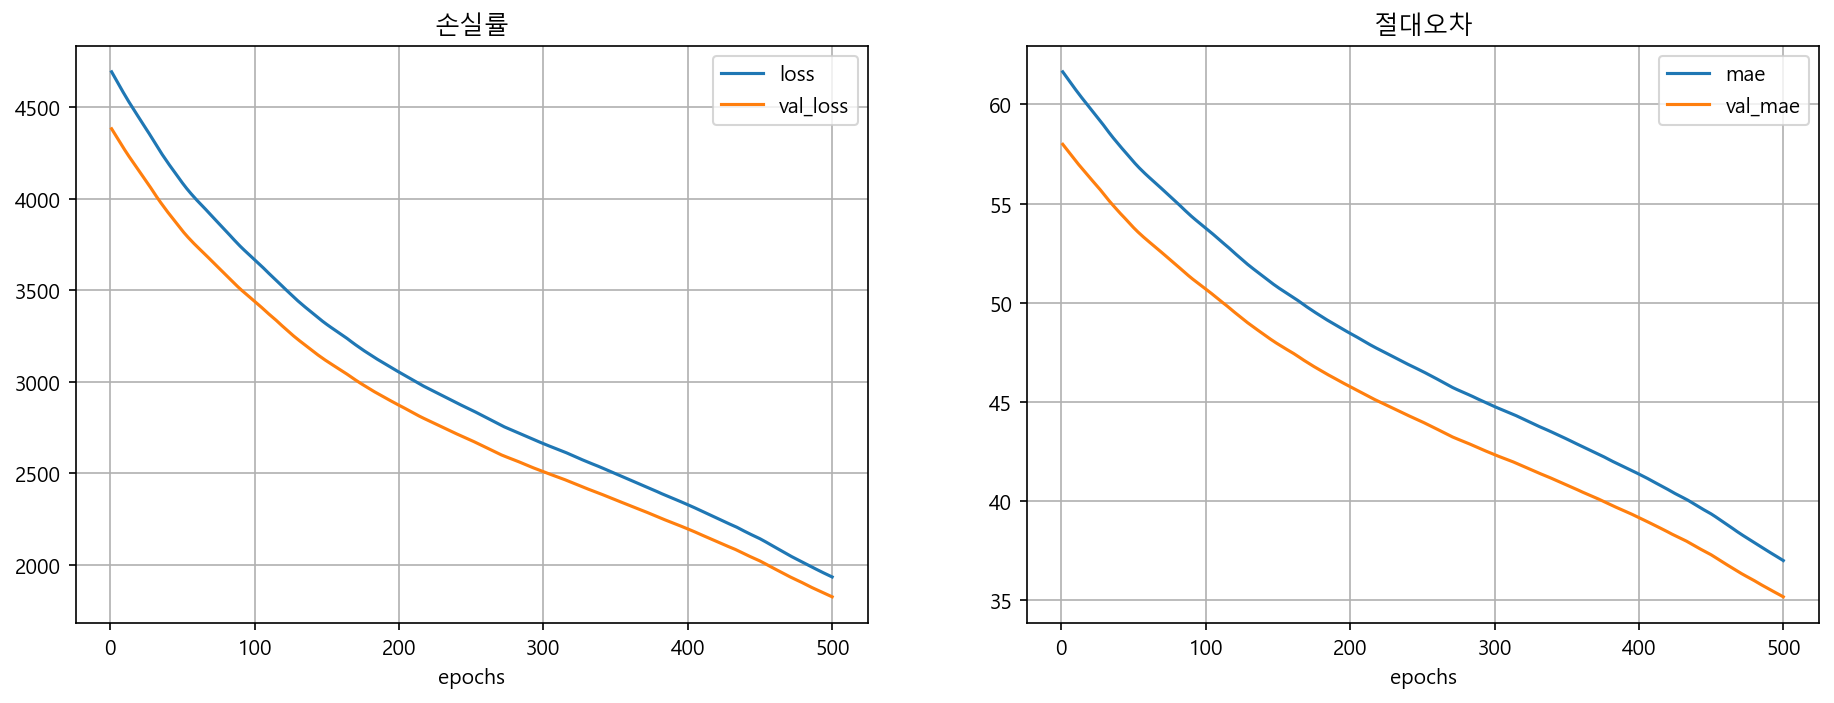

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5), dpi=150)
result_df.plot(y=['loss', 'val_loss'], ax=ax[0])
result_df.plot(y=['mae', 'val_mae'], ax=ax[1])
ax[0].set_title('손실률')
ax[1].set_title('절대오차')
ax[0].grid()
ax[1].grid()
plt.show()
plt.close()

## #04. 예측 결과 활용

### [1] 예측치 구하기

In [7]:
pred =  model.predict(x_test, verbose=0)
pred

array([[4.944291 ],
       [5.3144684],
       [7.1653547],
       [9.756596 ],
       [5.6846457],
       [2.3530495],
       [8.275887 ],
       [5.3144684],
       [7.1653547],
       [4.574114 ],
       [6.054823 ],
       [9.756596 ],
       [5.3144684],
       [8.275887 ],
       [4.2039366]], dtype=float32)

### [2] 결과 데이터 셋 구성

In [8]:
kdf = DataFrame({
    '검증데이터': x_test['speed'],
    '실제값': y_test,
    '예측값' : pred.flatten()
})

kdf['오차'] = kdf['실제값']-kdf['예측값']

my_pretty_table(kdf)

+----+--------------+----------+----------+----------+
|    |   검증데이터 |   실제값 |   예측값 |     오차 |
|----+--------------+----------+----------+----------|
| 10 |           11 |       28 |  4.94429 |  23.0557 |
| 13 |           12 |       24 |  5.31447 |  18.6855 |
| 30 |           17 |       50 |  7.16535 |  42.8346 |
| 46 |           24 |       92 |   9.7566 |  82.2434 |
| 18 |           13 |       46 |  5.68465 |  40.3154 |
|  0 |            4 |        2 |  2.35305 | -0.35305 |
| 40 |           20 |       52 |  8.27589 |  43.7241 |
| 12 |           12 |       20 |  5.31447 |  14.6855 |
| 29 |           17 |       40 |  7.16535 |  32.8346 |
|  8 |           10 |       34 |  4.57411 |  29.4259 |
| 21 |           14 |       60 |  6.05482 |  53.9452 |
| 47 |           24 |       93 |   9.7566 |  83.2434 |
| 11 |           12 |       14 |  5.31447 |  8.68553 |
| 41 |           20 |       56 |  8.27589 |  47.7241 |
|  5 |            9 |       10 |  4.20394 |  5.79606 |
+----+--------------+--

### [3] 관측치와 예측치 비교 시각화

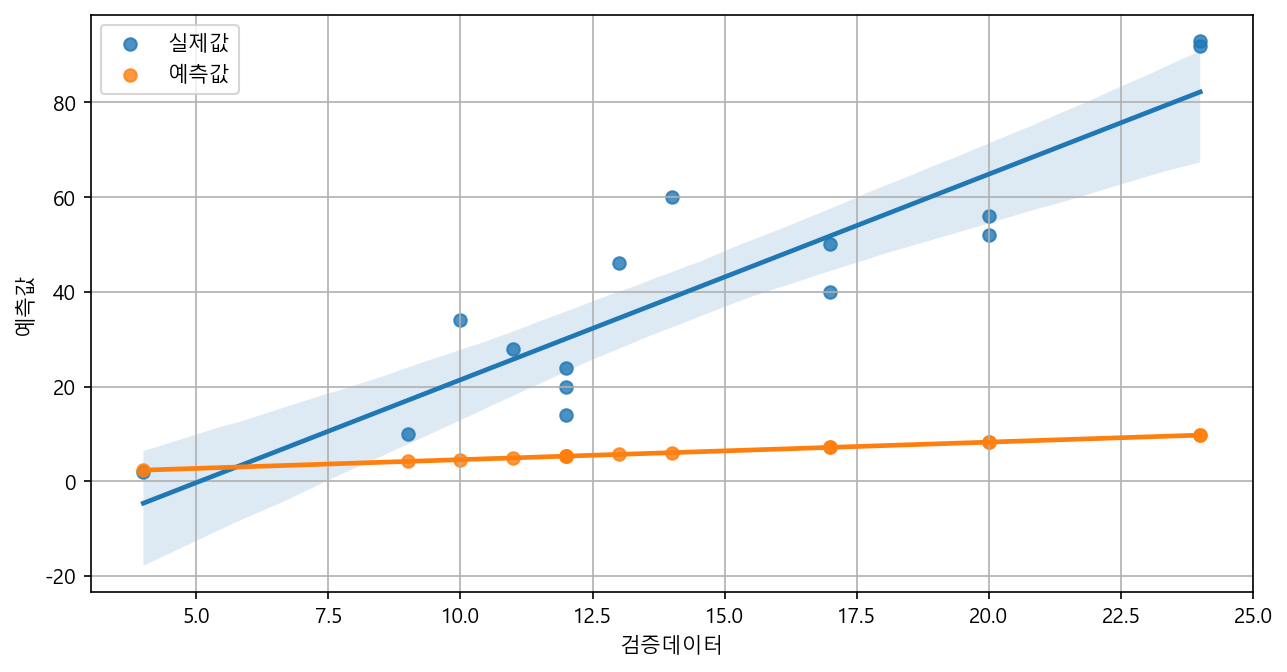

In [9]:
fig = plt.figure(figsize=(10, 5), dpi=150)
ax = fig.gca()

sb.regplot(data=kdf, x='검증데이터', y='실제값', label='실제값', ax=ax)
sb.regplot(data=kdf, x='검증데이터', y='예측값', label='예측값', ax=ax)
ax.legend()
ax.grid()
plt.show()
plt.close()

### [3] 임의의 값에 대한 머신러닝 예측 결과

#### (1) 단일 값을 통한 예측

In [10]:
my_speed = 50
my_speed_arr = np.array([[my_speed]])
my_dist = model.predict(my_speed_arr, verbose=0)
print("속도가 %d인 자동차의 제동거리는 %d로 예상됩니다." % (my_speed, my_dist))

속도가 50인 자동차의 제동거리는 19로 예상됩니다.


C:\Users\yjg10\AppData\Local\Temp\ipykernel_27464\3530049991.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("속도가 %d인 자동차의 제동거리는 %d로 예상됩니다." % (my_speed, my_dist))


### [4] 사용자 인터페이스 적용

In [11]:
@interact(x= (0, 100, 1))
def test(x):
    #print(x)
    input_x = np.array([[x]])
    output_y = model.predict(input_x, verbose=0)
    print("속도가 %d인 자동차의 제동거리는 %d로 예상됩니다." % (x, output_y))

interactive(children=(IntSlider(value=50, description='x'), Output()), _dom_classes=('widget-interact',))

In [12]:
@interact(my_choose=['train', 'test'])
def show_data(my_choose):
    yname = '실제값' if my_choose == 'test' else '예측값'

    fig = plt.figure(figsize=(10, 5), dpi=100)
    ax = fig.gca()
    sb.regplot(data=kdf, x='검증데이터', y=yname, ax=ax)
    ax.grid()
    plt.show()
    plt.close()

interactive(children=(Dropdown(description='my_choose', options=('train', 'test'), value='train'), Output()), …